In [ ]:
from google.colab import drive   #mounting the google drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Data Preprocessing Imports
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler 
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Mertics
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, roc_auc_score, classification_report

# Neural Network Imports
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC, Recall

from imblearn.under_sampling import RandomUnderSampler , NearMiss

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

data_path = '/content/drive/MyDrive/Drip Assignment/Datatape_1.csv'

In [ ]:
data = pd.read_csv(data_path)
data.shape

(750000, 41)

In [ ]:
data.head()

,loan_id,user_id,total_loan,year_of_loan,interest,monthly_payment,class,sub_class,employment_grade,work_year,...,earlies_credit_mon,title,policy_code,f0,f1,f2,f3,f4,f5,is_default
0,119262,0,12000,5,11.53,264.10,B,B5,1,NaN,...,Mar-84,0.0,1,1.0,0.0,8.0,17.0,8.0,1.0,1
1,369815,1,8000,3,13.98,273.35,C,C3,1,10+ years,...,Jan-92,94.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
2,787833,2,20000,5,17.99,507.76,D,D2,3,10+ years,...,Oct-96,0.0,1,6.0,0.0,10.0,8.0,3.0,0.0,0
3,671675,3,10700,3,10.16,346.07,B,B1,1,2 years,...,Jul-00,41646.0,1,3.0,0.0,4.0,11.0,6.0,0.0,0
4,245160,4,8000,3,8.24,251.58,B,B1,1,5 years,...,Mar-00,4.0,1,3.0,0.0,8.0,6.0,4.0,1.0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 41 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   loan_id                   750000 non-null  int64  
 1   user_id                   750000 non-null  int64  
 2   total_loan                750000 non-null  int64  
 3   year_of_loan              750000 non-null  int64  
 4   interest                  750000 non-null  float64
 5   monthly_payment           750000 non-null  float64
 6   class                     750000 non-null  object 
 7   sub_class                 750000 non-null  object 
 8   employment_grade          750000 non-null  int64  
 9   work_year                 706153 non-null  object 
 10  house_exist               750000 non-null  int64  
 11  house_loan_status         750000 non-null  int64  
 12  salary                    750000 non-null  float64
 13  censor_status             750000 non-null  i

In [ ]:
data.describe()

,loan_id,user_id,total_loan,year_of_loan,interest,monthly_payment,employment_grade,house_exist,house_loan_status,salary,...,initial_list_status,title,policy_code,f0,f1,f2,f3,f4,f5,is_default
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,7.500000e+05,...,750000.000000,749999.000000,750000.0,712202.000000,684589.000000,712202.000000,712201.000000,712202.000000,712202.000000,750000.000000
mean,400033.712168,374999.500000,14419.406533,3.482909,13.240062,438.032920,1.888599,0.614275,0.594845,7.611840e+04,...,0.417179,1753.212240,1.0,5.592246,0.000805,8.577430,14.624197,8.110185,0.511900,0.199564
std,230968.542263,216506.495284,8717.343741,0.855931,4.767528,261.513407,2.087753,0.675669,0.675966,6.858267e+04,...,0.493093,7939.716437,0.0,3.216788,0.030010,7.403955,8.125875,4.800043,1.332783,0.399673
min,0.000000,0.000000,500.000000,3.000000,5.310000,15.690000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,199923.750000,187499.750000,8000.000000,3.000000,9.750000,248.450000,0.000000,0.000000,0.000000,4.560000e+04,...,0.000000,0.000000,1.0,3.000000,0.000000,4.000000,9.000000,5.000000,0.000000,0.000000
50%,400077.500000,374999.500000,12000.000000,3.000000,12.740000,375.160000,1.000000,1.000000,0.000000,6.500000e+04,...,0.000000,1.000000,1.0,5.000000,0.000000,7.000000,13.000000,7.000000,0.000000,0.000000
75%,600051.250000,562499.250000,20000.000000,3.000000,15.990000,580.730000,3.000000,1.000000,1.000000,9.000000e+04,...,1.000000,5.000000,1.0,7.000000,0.000000,11.000000,19.000000,11.000000,0.000000,0.000000
max,799999.000000,749999.000000,40000.000000,5.000000,30.990000,1715.420000,9.000000,5.000000,2.000000,1.099920e+07,...,1.000000,61680.000000,1.0,45.000000,4.000000,132.000000,128.000000,70.000000,51.000000,1.000000


In [ ]:
#Checking the Class Ratio
print('Percent Class 0 -',round((data['is_default'].value_counts()/len(data))[0]*100,2),'%')
print('Percent Class 1 -',round((data['is_default'].value_counts()/len(data))[1]*100,2),'%')

Percent Class 0 - 80.04 %
Percent Class 1 - 19.96 %


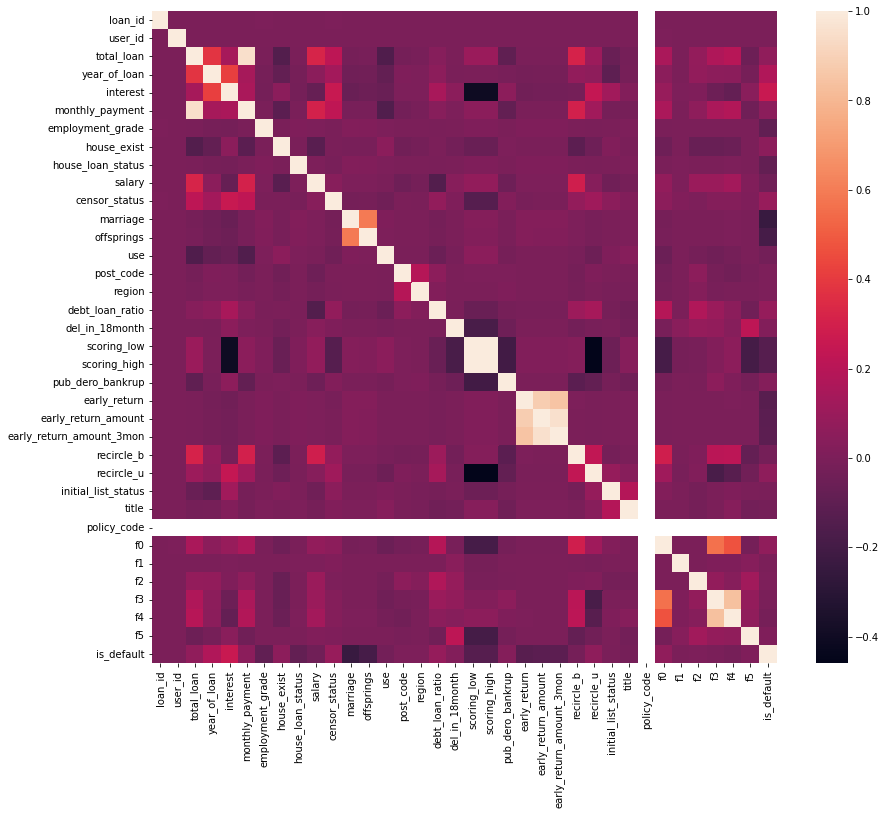

In [ ]:
plt.figure(figsize=(14,12))
sns.heatmap(data.corr())

In [ ]:
# Checking the policy_code feature

data['policy_code'].value_counts()

1    750000
Name: policy_code, dtype: int64

In [ ]:
data.drop('policy_code',axis=1,inplace=True)  # Drop this column because it contains only one value which shows no pattern

## **Data Cleaning**

### Null Values

In [ ]:
nulval = data.isnull().sum().to_frame().rename(columns={0:"absolute"})
nulval["percent"] = (nulval.apply(lambda x: x/x.sum())*100).round(2)
nulval

,absolute,percent
loan_id,0,0.00
user_id,0,0.00
total_loan,0,0.00
year_of_loan,0,0.00
interest,0,0.00
monthly_payment,0,0.00
class,0,0.00
sub_class,0,0.00
employment_grade,0,0.00
work_year,43847,14.65


##### Columns with missing values - 
#####'work_year' , 'debt_loan_ratio' , 'pub_dero_bankrup' ,'post_code', 'recircle_u' , 'title' , 'policy_code', 'f0', 'f1', 'f2', 'f3', 'f4', 'f5'

In [ ]:
# Mode of categorical type columns

print(data['work_year'].mode())
print(data['pub_dero_bankrup'].mode())

0    10+ years
dtype: object
0    0.0
dtype: float64


In [ ]:
# Imputing the missing values with mode of categorical type columns 

data['work_year'].replace(to_replace = np.nan,value = '10+ years',inplace=True) # Fill the nan values with '10+ years'
data['pub_dero_bankrup'].replace(to_replace = np.nan,value = 0,inplace=True)  # Fill the nan values with 0

In [ ]:
# Imputing the missing values with median of Numerical type columns 

columns_num = ['debt_loan_ratio','recircle_u','title','post_code','f0','f1','f2','f3','f4','f5']

for i in columns_num:
  data[i].fillna(value=data[i].median(),inplace=True) # Fill the nan values with median

## **Features Analysis**

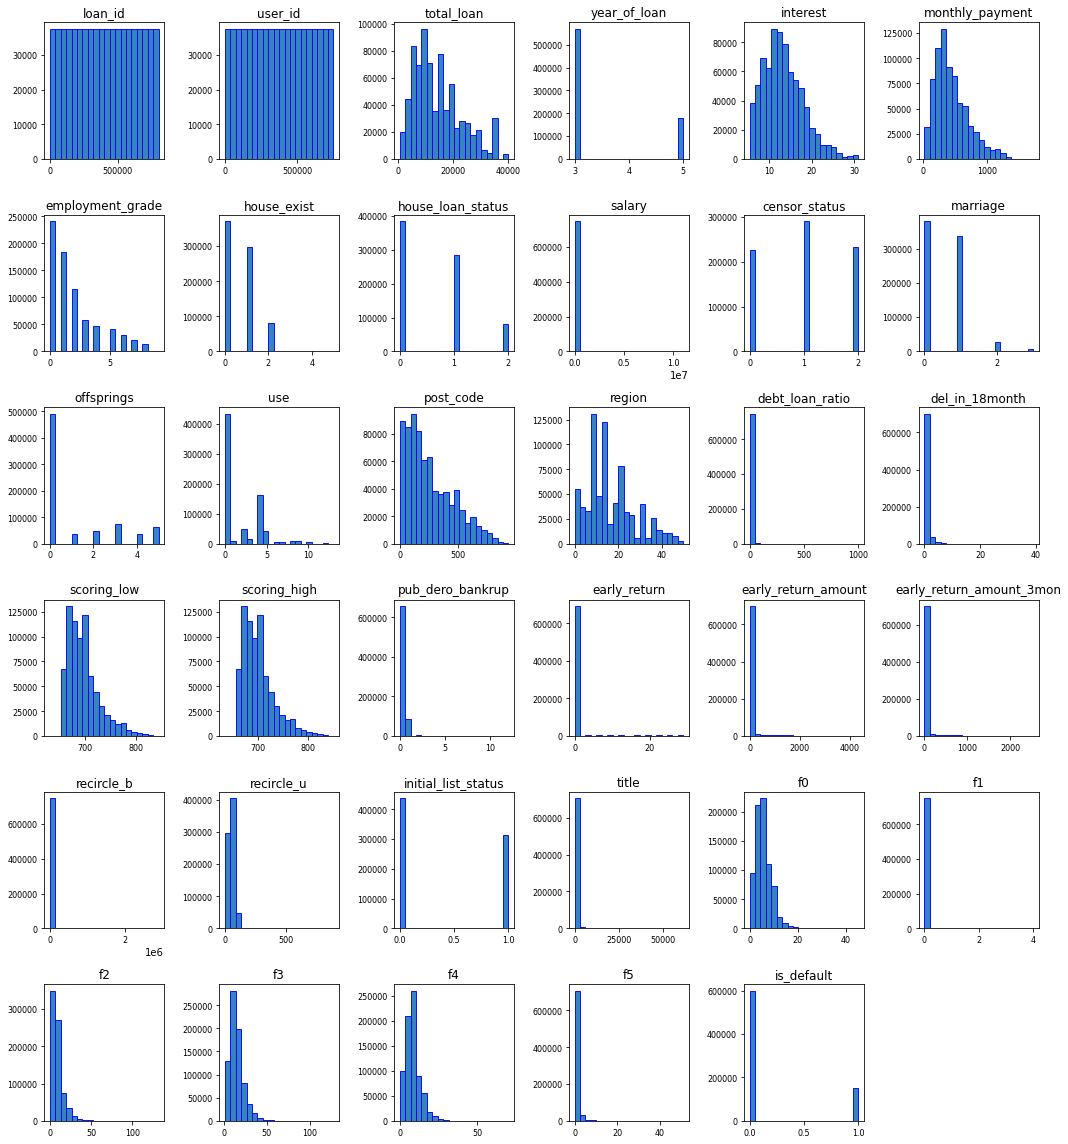

In [ ]:
#Plotting the histogram of every column to get the basic idea of features

data.hist(figsize=(15,16), bins=20, ec="b", xlabelsize=8, ylabelsize=8, alpha=0.9, grid=False)
plt.tight_layout()
plt.show()

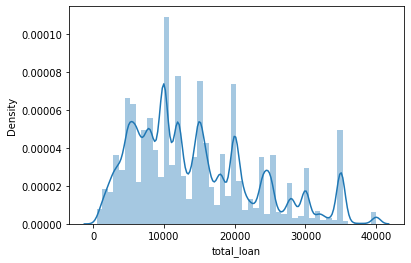

In [ ]:
sns.distplot(data['total_loan'])  # It is a Continuous Numerical Type of Column

In [ ]:
# Work Year

data['work_year'].value_counts() # It is a Categorical Type of Column

10+ years    290073
2 years       67987
< 1 year      60198
3 years       60128
1 year        49204
5 years       47027
4 years       45037
6 years       34910
8 years       33857
7 years       33200
9 years       28379
Name: work_year, dtype: int64

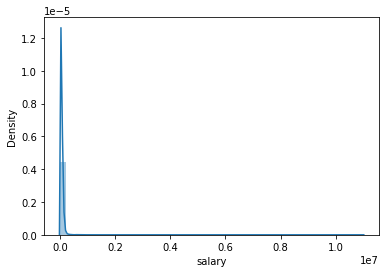

In [ ]:
sns.distplot(data['salary'])    # It is a Continuous Numerical Type of Column

In [ ]:
data['use'].value_counts()  # It is a Categorical Type of Column

0     435098
4     164467
2      48896
5      43384
3      16465
9       8666
1       8532
8       8126
10      5280
7       5039
6       4070
12      1272
11       523
13       182
Name: use, dtype: int64

In [ ]:
data['region'].value_counts()  # It is a Categorical Type of Column

8     109597
14     61683
13     60995
21     53295
2      28601
30     26873
0      25461
19     24543
3      24141
9      21477
7      21122
23     19660
10     18396
12     17346
26     17252
22     16631
18     16233
4      13269
11     12150
24     11975
32     11310
38     11238
36     10905
27      9879
17      9232
35      9045
5       8983
20      8518
43      7190
42      6834
15      6224
37      5632
45      5544
16      4019
28      3810
44      3724
33      3570
6       3275
39      2755
40      2139
31      2119
34      2008
25      1959
48      1772
41      1657
1       1517
29      1455
47      1135
49       956
46       891
50         5
Name: region, dtype: int64

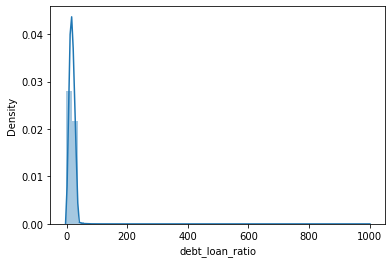

In [ ]:
sns.distplot(data['debt_loan_ratio'])  # It is a Continuous Numerical Type of Column

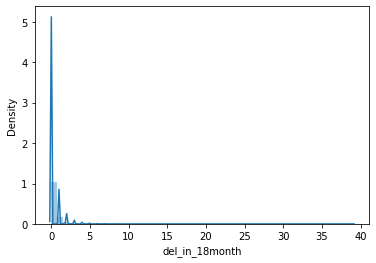

In [ ]:
sns.distplot(data['del_in_18month'])   # It is a Continuous Numerical Type of Column

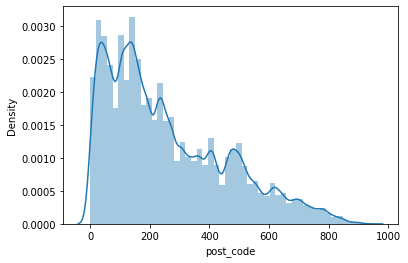

In [ ]:
sns.distplot(data['post_code'])    # It is a Continuous Numerical Type of Column

In [ ]:
data['scoring_low'].value_counts()  # It is a Categorical Type of Column

660    67466
670    65559
665    65241
675    58196
680    57375
685    50286
690    48804
695    44107
700    40558
705    36618
710    32110
715    28281
720    24353
725    19478
730    17096
735    13495
740    11821
745     9683
750     8811
755     7665
760     6286
765     5789
770     4966
775     4576
780     4027
785     3258
790     3082
795     2470
800     2109
805     1808
810     1318
815     1047
820      791
825      597
830      386
835      242
840      132
845      112
630        1
Name: scoring_low, dtype: int64

In [ ]:
data['scoring_high'].value_counts()  # It is a Categorical Type of Column

664    67466
674    65559
669    65241
679    58196
684    57375
689    50286
694    48804
699    44107
704    40558
709    36618
714    32110
719    28281
724    24353
729    19478
734    17096
739    13495
744    11821
749     9683
754     8811
759     7665
764     6286
769     5789
774     4966
779     4576
784     4027
789     3258
794     3082
799     2470
804     2109
809     1808
814     1318
819     1047
824      791
829      597
834      386
839      242
844      132
850      112
634        1
Name: scoring_high, dtype: int64

In [ ]:
data['pub_dero_bankrup'].value_counts()  # It is a Categorical Type of Column

0.0     656845
1.0      87630
2.0       4297
3.0        880
4.0        231
5.0         76
6.0         23
7.0         11
8.0          3
9.0          3
12.0         1
Name: pub_dero_bankrup, dtype: int64

In [ ]:
data['early_return'].value_counts()  # It is a Categorical Type of Column

0     690074
2       2164
14      2144
13      2140
22      2128
19      2108
3       2106
20      2103
26      2096
8       2090
5       2085
24      2082
25      2075
27      2069
18      2065
16      2063
10      2061
6       2050
1       2049
7       2045
29      2043
23      2038
9       2038
17      2027
21      2022
28      2019
15      2019
11      2007
4       2001
12      1989
Name: early_return, dtype: int64

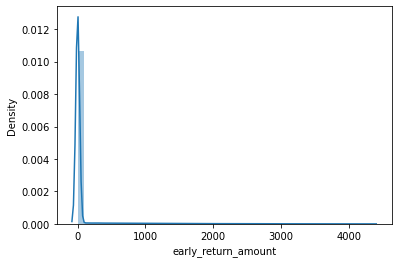

In [ ]:
sns.distplot(data['early_return_amount'])    # It is a Continuous Numerical Type of Column

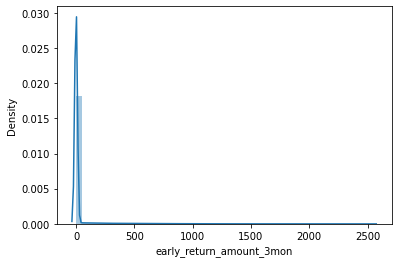

In [ ]:
sns.distplot(data['early_return_amount_3mon'])    # It is a Continuous Numerical Type of Column

In [ ]:
data['initial_list_status'].value_counts()  # It is a Categorical Type of Column

0    437116
1    312884
Name: initial_list_status, dtype: int64

In [ ]:
data['earlies_credit_mon'].value_counts()  # It is a Categorical Type of Column

Aug-01    5215
Aug-02    5065
Sep-03    5050
Oct-01    4925
Sep-04    4909
          ... 
Oct-54       1
Oct-57       1
Jan-46       1
Jun-58       1
Feb-60       1
Name: earlies_credit_mon, Length: 718, dtype: int64

In [ ]:
data['issue_date']  # It is a Categorical Type of Column

0          6/1/2015
1         10/1/2010
2          8/1/2016
3          5/1/2013
4          4/1/2017
            ...    
749995     2/1/2016
749996     3/1/2014
749997    12/1/2015
749998    12/1/2017
749999    12/1/2013
Name: issue_date, Length: 750000, dtype: object

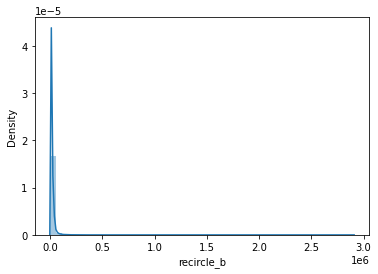

In [ ]:
sns.distplot(data['recircle_b'])    # It is a Continuous Numerical Type of Column

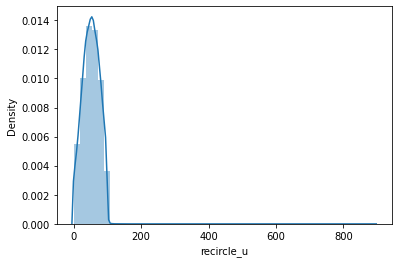

In [ ]:
sns.distplot(data['recircle_u'])    # It is a Continuous Numerical Type of Column

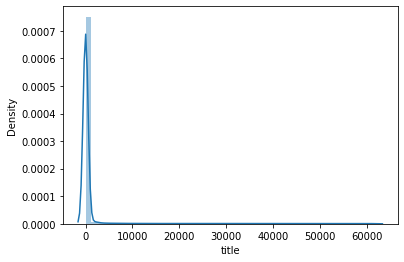

In [ ]:
sns.distplot(data['title'])    # It is a Continuous Numerical Type of Column

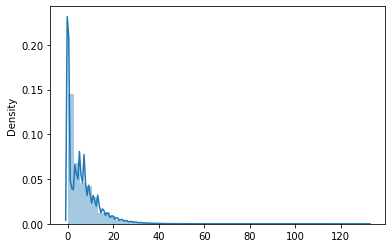

In [ ]:
sns.distplot(data[['f0', 'f1', 'f2', 'f3', 'f4', 'f5']])    # It is a Continuous Numerical Type of Column

## Categorical Type Features -
#### year of loan, 'class', 'sub_class', 'employment_grade' , 'work_year', 'house_exist', 'house_loan_status', 'censor_status', 'marriage', 'offsprings', 'issue_date', 'use', 'region', 'scoring_low', 'scoring_high', 'pub_dero_bankrup', 'early_return', 'initial_list_status', 'earlies_credit_mon'


## Numerical Type Features
####'total_loan', 'interest', 'monthly_payment', 'salary', 'post_code', 'debt_loan_ratio', 'del_in_18month', 'early_return_amount', 'early_return_amount_3mon', 'recircle_b', 'recircle_u', 'title', 'f0', 'f1', 'f2', 'f3', 'f4', 'f5'

#### Columns-  'loan_id','user_id','issue_date','earlies_credit_mon' 
#### should be dropped because ids does not provide any significant detail for modelling and issue date & early cerdit mon is a datetime column

In [ ]:
data.drop(['loan_id','user_id','issue_date','earlies_credit_mon'],axis=1,inplace=True)

## **Modelling without Random Undersampling**

In [ ]:
df = data.copy()
df.head()

,total_loan,year_of_loan,interest,monthly_payment,class,sub_class,employment_grade,work_year,house_exist,house_loan_status,...,recircle_u,initial_list_status,title,f0,f1,f2,f3,f4,f5,is_default
0,12000,5,11.53,264.10,B,B5,1,10+ years,0,0,...,23.1,0,0.0,1.0,0.0,8.0,17.0,8.0,1.0,1
1,8000,3,13.98,273.35,C,C3,1,10+ years,0,1,...,99.9,1,94.0,5.0,0.0,7.0,13.0,7.0,0.0,0
2,20000,5,17.99,507.76,D,D2,3,10+ years,0,0,...,72.5,0,0.0,6.0,0.0,10.0,8.0,3.0,0.0,0
3,10700,3,10.16,346.07,B,B1,1,2 years,2,0,...,78.6,0,41646.0,3.0,0.0,4.0,11.0,6.0,0.0,0
4,8000,3,8.24,251.58,B,B1,1,5 years,1,2,...,67.8,1,4.0,3.0,0.0,8.0,6.0,4.0,1.0,0


In [ ]:
features = df.drop(['is_default'],axis=1)
target   = df['is_default']

### Encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

x_ord = oe.fit_transform(features[['work_year']])


In [ ]:
from sklearn.preprocessing import OneHotEncoder

onc = OneHotEncoder(sparse=False)

x_onc = onc.fit_transform(features[['class', 'employment_grade', 'house_loan_status', 'censor_status','pub_dero_bankrup']])
x_onc.shape

(750000, 34)

### Scaling

In [ ]:
rbs = RobustScaler()

x_num = rbs.fit_transform(features[['total_loan', 'interest', 'monthly_payment', 'salary', 'post_code', 'debt_loan_ratio', 'del_in_18month', 
           'early_return_amount', 'early_return_amount_3mon', 'recircle_b', 'recircle_u', 'title', 'f0', 'f1', 'f2', 'f3', 'f4']])


In [ ]:
x_cat = np.array(features[['year_of_loan', 'house_exist', 'use','region', 'early_return','scoring_low','scoring_high', 'initial_list_status']])


### Concat to processed data

In [ ]:
X_new  = np.concatenate((x_ord,x_onc,x_num,x_cat),axis=1)
X_new.shape

(750000, 60)

### Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new,target,test_size=0.1,random_state=123)

### Classifiers

#### Logistic Regression

In [ ]:
lg = LogisticRegression(n_jobs=-1)

lg.fit(X_train, y_train)

# cross_val_score(lg,X_train,y_train,scoring = 'roc_auc',cv=3,n_jobs=-1,verbose=1)   #To check that if model is not overfitting

LogisticRegression(n_jobs=-1)

In [ ]:
# F1 Score

y_hat = lg.predict(X_test)
f1_score(y_test,y_hat)

0.18214816036957598

In [ ]:
# ROC-AUV Score

roc_auc_score(y_test,y_hat)

0.5426264420220814

#### Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier(n_jobs=-1)

rfc.fit(X_train, y_train)

# cross_val_score(rfc,X_train,y_train,scoring = 'roc_auc',cv=3,n_jobs=-1,verbose=1)    #To check that if model is not overfitting

RandomForestClassifier(n_jobs=-1)

In [ ]:
# F1 Score

y_hat = rfc.predict(X_test)
f1_score(y_test,y_hat)

0.20980837934394284

In [ ]:
# ROC-AUV Score

roc_auc_score(y_test,y_hat)

0.5519301410172074

#### XG Boost Classifier

In [ ]:
xgb_clf = XGBClassifier(use_label_encoder=False)

xgb_clf.fit(X_train, y_train)

# cross_val_score(xgb_clf,X_train,y_train,scoring = 'roc_auc',cv=3,n_jobs=-1,verbose=1)    #To check that if model is not overfitting

XGBClassifier(use_label_encoder=False)

In [ ]:
# F1 Score

y_hat = xgb_clf.predict(X_test)
f1_score(y_test,y_hat)

0.16377341251713112

In [ ]:
# ROC-AUV Score

roc_auc_score(y_test,y_hat)

0.5389869655684583

#### GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier()

gbc.fit(X_train,y_train)

# cross_val_score(gbc,X_train,y_train,scoring = 'roc_auc',cv=3,n_jobs=-1,verbose=1)      #To check that if model is not overfitting

GradientBoostingClassifier()

In [ ]:
# F1 Score

y_hat = gbc.predict(X_test)
f1_score(y_test,y_hat)

0.19206287706868877

In [ ]:
# ROC-AUV Score

roc_auc_score(y_test,y_hat)

0.5468797413208446

#### Neural Network

In [ ]:
def nn_model(num_columns, num_labels, hidden_units, dropout_rates, learning_rate):
    inp = tf.keras.layers.Input(shape=(num_columns, ))
    x = BatchNormalization()(inp)
    x = Dropout(dropout_rates[0])(x)
    for i in range(len(hidden_units)):
        x = Dense(hidden_units[i], activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(dropout_rates[i + 1])(x)
    x = Dense(num_labels, activation='sigmoid')(x)
  
    model = Model(inputs=inp, outputs=x)
    model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=[AUC(name='AUC')])
    return model

In [ ]:
num_columns = X_train.shape[1]
num_labels = 1
hidden_units = [50, 50, 25,10]
dropout_rates = [0.1, 0, 0.1, 0,0.1]
learning_rate = 1e-5


model = nn_model(
    num_columns=num_columns, 
    num_labels=num_labels,
    hidden_units=hidden_units,
    dropout_rates=dropout_rates,
    learning_rate=learning_rate
)
r = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32
)

Epoch 1/10
21094/21094 [==============================] - 132s 6ms/step - loss: 0.6467 - AUC: 0.5915 - val_loss: 0.5196 - val_AUC: 0.6671
Epoch 2/10
21094/21094 [==============================] - 96s 5ms/step - loss: 0.4984 - AUC: 0.6534 - val_loss: 0.4628 - val_AUC: 0.7083
Epoch 3/10
21094/21094 [==============================] - 94s 4ms/step - loss: 0.4667 - AUC: 0.6904 - val_loss: 0.4495 - val_AUC: 0.7268
Epoch 4/10
21094/21094 [==============================] - 93s 4ms/step - loss: 0.4563 - AUC: 0.7091 - val_loss: 0.4448 - val_AUC: 0.7351
Epoch 5/10
21094/21094 [==============================] - 108s 5ms/step - loss: 0.4512 - AUC: 0.7183 - val_loss: 0.4405 - val_AUC: 0.7409
Epoch 6/10
21094/21094 [==============================] - 112s 5ms/step - loss: 0.4475 - AUC: 0.7248 - val_loss: 0.4386 - val_AUC: 0.7438
Epoch 7/10
21094/21094 [==============================] - 94s 4ms/step - loss: 0.4444 - AUC: 0.7304 - val_loss: 0.4372 - val_AUC: 0.7469
Epoch 8/10
21094/21094 [==============

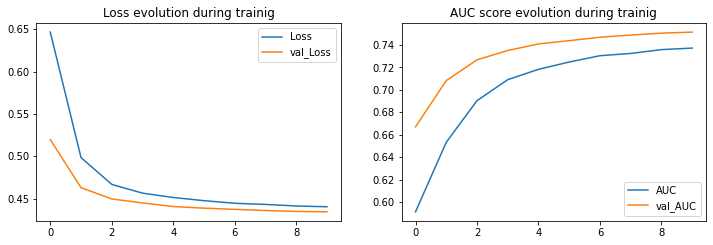

In [ ]:
def plot_learning_evolution(r):
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.plot(r.history['loss'], label='Loss')
    plt.plot(r.history['val_loss'], label='val_Loss')
    plt.title('Loss evolution during trainig')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(r.history['AUC'], label='AUC')
    plt.plot(r.history['val_AUC'], label='val_AUC')
    plt.title('AUC score evolution during trainig')
    plt.legend();


plot_learning_evolution(r)

In [ ]:
# F1 Score

y_hat = model.predict(X_test)
f1_score(y_test,y_hat.round())

0.12950655766629418

In [ ]:
# ROC_AUC score

roc_auc_score(y_test,y_hat.round())

0.529379566917107

## **Modelling using Random Undersampling of Data**

In [ ]:
# Sampling random indexes of class 0 to get 50-50 balance between classes

import random

x_0 = df[df['is_default']==0]                                                         # Dataframe for class 0
indx_0 = list(x_0.index)                                                              
indx = np.random.choice(indx_0,size=df['is_default'].value_counts()[1],replace=False)  # Randomly selecting the indexes of class 0, size equal to class 1
len(indx)

149673

In [ ]:
x_0_sample = df.loc[indx]  # Sampling the dataset using the above indexes

x_1 = df[df['is_default']==1]

x_usample = pd.concat([x_0_sample,x_1],axis=0) # Concatenate with class 1

In [ ]:
x_usample.shape

(299346, 36)

### Encoding

In [ ]:
# Ordinal Encoding

oe = OrdinalEncoder()                       

x_ord = oe.fit_transform(x_usample[['work_year']])

In [ ]:
# One Hot Encoding

onc = OneHotEncoder(sparse=False)

x_onc = onc.fit_transform(x_usample[['class', 'employment_grade', 'house_loan_status', 'censor_status','pub_dero_bankrup']])
x_onc.shape

(299346, 33)

### Scaling the data

In [ ]:
rbs = RobustScaler()

x_num = rbs.fit_transform(x_usample[['total_loan', 'interest', 'monthly_payment', 'salary', 'post_code', 'debt_loan_ratio', 'del_in_18month', 
           'early_return_amount', 'early_return_amount_3mon', 'recircle_b', 'recircle_u', 'title', 'f0', 'f1', 'f2', 'f3', 'f4']])


In [ ]:

x_cat = np.array(x_usample[['year_of_loan', 'house_exist', 'use','region', 'early_return','scoring_low','scoring_high', 'initial_list_status']])


### Concat to get processed data

In [ ]:
X_new  = np.concatenate((x_ord,x_onc,x_num,x_cat),axis=1)

In [ ]:
X_new.shape

(299346, 59)

In [ ]:
y = x_usample['is_default']

### Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new,y,test_size=0.2,random_state=123)

### Classifiers

#### Logistic Regression

In [ ]:
lg = LogisticRegression(n_jobs=-1)

lg.fit(X_train, y_train)

# cross_val_score(lg,X_train,y_train,scoring = 'roc_auc',cv=3,n_jobs=-1,verbose=1)

LogisticRegression(n_jobs=-1)

In [ ]:
# F1 Score

y_hat = lg.predict(X_test)
f1_score(y_test,y_hat)

0.689238288157937

In [ ]:
# ROC-AUV Score

roc_auc_score(y_test,y_hat)

0.6772048756588506

#### Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier(n_jobs=-1)

rfc.fit(X_train, y_train)

# cross_val_score(rfc,X_train,y_train,scoring = 'roc_auc',cv=3,n_jobs=-1,verbose=1)

RandomForestClassifier(n_jobs=-1)

In [ ]:
# F1 Score

y_hat = rfc.predict(X_test)
f1_score(y_test,y_hat)

0.6978749515566465

In [ ]:
# ROC-AUV Score

roc_auc_score(y_test,y_hat)

0.687552576080295

#### XG Boost Classifier

In [ ]:
xgb_clf = XGBClassifier(use_label_encoder=False)

xgb_clf.fit(X_train, y_train)

# cross_val_score(xgb_clf,X_train,y_train,scoring = 'roc_auc',cv=3,n_jobs=-1,verbose=1)

XGBClassifier(use_label_encoder=False)

In [ ]:
# F1 Score

y_hat = xgb_clf.predict(X_test)
f1_score(y_test,y_hat)

0.7094950005528615

In [ ]:
# ROC-AUV Score

roc_auc_score(y_test,y_hat)

0.692921584447089

#### GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

gbc.fit(X_train,y_train)

# cross_val_score(gbc,X_train,y_train,scoring = 'roc_auc',cv=3,n_jobs=-1,verbose=1) 

GradientBoostingClassifier()

In [ ]:
# F1 Score

y_hat = gbc.predict(X_test)
f1_score(y_test,y_hat)

0.7098325135618149

In [ ]:
# ROC-AUV Score

roc_auc_score(y_test,y_hat)

0.6936542057645849

#### Neural Network

In [ ]:
def nn_model(num_columns, num_labels, hidden_units, dropout_rates, learning_rate):
    inp = tf.keras.layers.Input(shape=(num_columns, ))
    x = BatchNormalization()(inp)
    x = Dropout(dropout_rates[0])(x)
    for i in range(len(hidden_units)):
        x = Dense(hidden_units[i], activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(dropout_rates[i + 1])(x)
    x = Dense(num_labels, activation='sigmoid')(x)
  
    model = Model(inputs=inp, outputs=x)
    model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=[AUC(name='AUC')])
    return model

In [ ]:
num_columns = X_train.shape[1]
num_labels = 1
hidden_units = [50, 50, 25,10]
dropout_rates = [0.1, 0, 0.1, 0,0.1]
learning_rate = 1e-5


model = nn_model(
    num_columns=num_columns, 
    num_labels=num_labels,
    hidden_units=hidden_units,
    dropout_rates=dropout_rates,
    learning_rate=learning_rate
)
r = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32
)

Epoch 1/10
7484/7484 [==============================] - 49s 6ms/step - loss: 0.8409 - AUC: 0.6070 - val_loss: 0.7063 - val_AUC: 0.6635
Epoch 2/10
7484/7484 [==============================] - 36s 5ms/step - loss: 0.7074 - AUC: 0.6520 - val_loss: 0.6505 - val_AUC: 0.6879
Epoch 3/10
7484/7484 [==============================] - 38s 5ms/step - loss: 0.6688 - AUC: 0.6671 - val_loss: 0.6275 - val_AUC: 0.7049
Epoch 4/10
7484/7484 [==============================] - 38s 5ms/step - loss: 0.6498 - AUC: 0.6789 - val_loss: 0.6161 - val_AUC: 0.7139
Epoch 5/10
7484/7484 [==============================] - 36s 5ms/step - loss: 0.6373 - AUC: 0.6886 - val_loss: 0.6091 - val_AUC: 0.7224
Epoch 6/10
7484/7484 [==============================] - 41s 5ms/step - loss: 0.6304 - AUC: 0.6969 - val_loss: 0.6043 - val_AUC: 0.7278
Epoch 7/10
7484/7484 [==============================] - 38s 5ms/step - loss: 0.6249 - AUC: 0.7038 - val_loss: 0.6008 - val_AUC: 0.7321
Epoch 8/10
7484/7484 [==============================] -

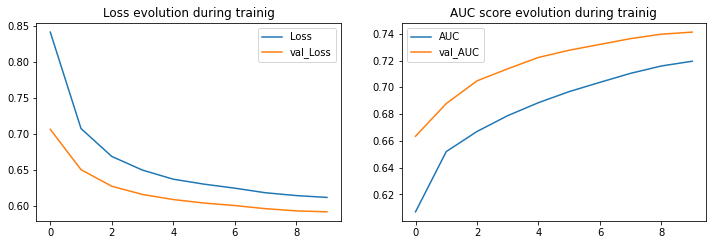

In [ ]:
def plot_learning_evolution(r):
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.plot(r.history['loss'], label='Loss')
    plt.plot(r.history['val_loss'], label='val_Loss')
    plt.title('Loss evolution during trainig')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(r.history['AUC'], label='AUC')
    plt.plot(r.history['val_AUC'], label='val_AUC')
    plt.title('AUC score evolution during trainig')
    plt.legend();


plot_learning_evolution(r)

In [ ]:
# F1 Score

y_hat = model.predict(X_test)
f1_score(y_test,y_hat.round())

0.7060485034395834

In [ ]:
# ROC-AUV Score

roc_auc_score(y_test,y_hat)

0.741351616165731